Webserver connection status:
 -- connection result → online
List of MAC addresses:
  1. 0xf923ceffb10f
  2. 0xc39dd897a532
  3. 0x32fd4bd02e26
  4. 0x86266b5e53b
Battery status from 2024-01-01 to 2024-03-02:
 -- records of `0xf923ceffb10f` → plugged: 0, unplugged: 40
 -- records of `0xc39dd897a532` → plugged: 27, unplugged: 3
 -- records of `0x32fd4bd02e26` → plugged: 16, unplugged: 24
 -- records of `0x86266b5e53b` → plugged: 80, unplugged: 0
List of MAC addresses considering blt=25 and plugged=0:
 -- 0. 0xc39dd897a532
Delete status:
 -- data of `0xf923ceffb10f` deleted


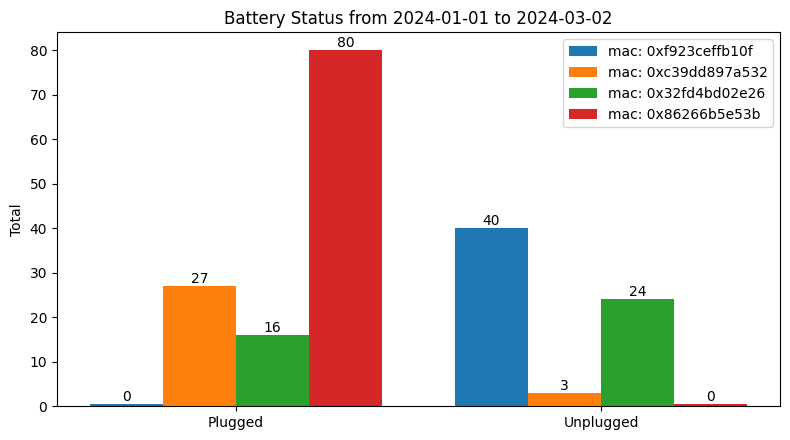

In [1]:
## ------------------------------------------ packages ------------------------------------------ ##
import requests
import matplotlib.pyplot as plt


## ------------------------------------- initial variables -------------------------------------- ##
REST_URL = 'http://localhost:8080'

START_DATE = '2024-01-01'
END_DATE = '2024-03-02'
BLT = 25
PLUGGED = 0


## ------------------------------------------ functions ----------------------------------------- ##
def send_request(method, *path, **query):
    uri = REST_URL
    if len(path) > 0:
        uri += '/'+'/'.join(path)
    if method == 'get':
        response = requests.get(uri, params=query)
    elif method == 'delete':
        response = requests.delete(uri, params=query)
    if response.status_code == 200:
        try:
            decoded_reponse = response.json()
        except:
            print(f' -- the response is not in json')
            exit()
    else:
        print(f' -- webserver Error!')
        exit() 
    return decoded_reponse


## ------------------------------------ webserver connection ------------------------------------ ##
print('Webserver connection status:')
decoded_reponse = send_request('get', 'status')
status = decoded_reponse['status']
print(f' -- connection result \u2192 {status}')


## ----------------------------------------- main loop ------------------------------------------ ##
# getting all the devices
print('List of MAC addresses:')
decoded_reponse = send_request('get', 'devices')
mac_addresses = decoded_reponse['mac_addresses']
if len(mac_addresses) > 0:
    for i, mac_address in enumerate(mac_addresses):
        print(f'  {i+1}. {mac_address}')
else:
    print(' -- the list of mac addresses is empty')

# getting the battery status of each device
print(f'Battery status from {START_DATE} to {END_DATE}:')
data_to_plot = []
if len(mac_addresses) > 0:
    for mac_address in mac_addresses:
        decoded_reponse = send_request('get', 'device', mac_address, start_date=START_DATE, end_date=END_DATE)
        power_pluggeds = decoded_reponse['power_plugged']
        total_plugged = sum(power_pluggeds)
        total_unplugged = len(power_pluggeds) - total_plugged
        data_to_plot.append((total_plugged, total_unplugged, mac_address))
        print(f' -- records of `{mac_address}` \u2192 plugged: {total_plugged}, unplugged: {total_unplugged}')      
else:
    print(' -- the list of mac addresses is empty')

# getting the devices with the required condition
print(f'List of MAC addresses considering blt={BLT} and plugged={PLUGGED}:')
decoded_reponse = send_request('get', 'devices', blt=BLT, plugged=PLUGGED)
mac_addresses_with_condition = decoded_reponse['mac_addresses']
if len(mac_addresses_with_condition) > 0:
    for i, mac_address_with_condition in enumerate(mac_addresses_with_condition):
        print(f' -- {i}. {mac_address_with_condition}')
else:
    print(' -- the list of mac addresses is empty')

# deleting the first device
print('Delete status:')
if len(mac_addresses) > 0:
    send_request('delete', 'device', mac_addresses[0])
    print(f' -- data of `{mac_addresses[0]}` deleted')
else:
    print(f' -- the list of mac addresses is empty')


## ----------------------------------------- bar chart ------------------------------------------ ##
if len(mac_addresses) > 0:
    fig = plt.figure(figsize=(8, 4.5))
    ax = fig.add_subplot()
    ax.set_title(f'Battery Status from {START_DATE} to {END_DATE}')
    ax.set_ylabel('Total')
    ax.set_xticks([-0.5*(len(data_to_plot)+1), 0.5*(len(data_to_plot)+1)], ['Plugged', 'Unplugged'])
    for i, row in enumerate(data_to_plot):
        total_plugged = row[0] if row[0] != 0 else 0.5
        total_unplugged = row[1] if row[1] != 0 else 0.5
        ax.bar((i-len(data_to_plot), i+1), (total_plugged, total_unplugged), 1, label=f'mac: {row[-1]}')
        ax.text(i-len(data_to_plot), total_plugged, row[0], ha='center', va='bottom')
        ax.text(i+1, total_unplugged, row[1], ha='center', va='bottom')
    ax.legend()
    fig.tight_layout()
    plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c66c7ed3-adef-44a1-955f-b8ce9193a2a0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>